## Clustering: kaggle Mall Customers
https://www.kaggle.com/shwetabh123/mall-customers

** Dataset Information: **

200 mall customer information

** Attribute Information:**

- CustomerID
- Genre
- Age
- Annual Income (k$)
- Spending Score (1-100)

** Objective of this project **

Cluster customers using two features (Income and Spending score)

## Data

In [48]:
# Load Data
df  <- read.csv('Mall_Customers.csv')

In [31]:
# Inspect Data
head(df,3)

CustomerID,Genre,Age,Annual.Income..k..,Spending.Score..1.100.
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [32]:
dim(df)

[1] 200   5

In [33]:
str(df)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Genre                 : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [34]:
summary(df)

   CustomerID        Genre          Age        Annual.Income..k..
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50                Median :36.00   Median : 61.50    
 Mean   :100.50                Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [35]:
any(is.na(df))

[1] FALSE

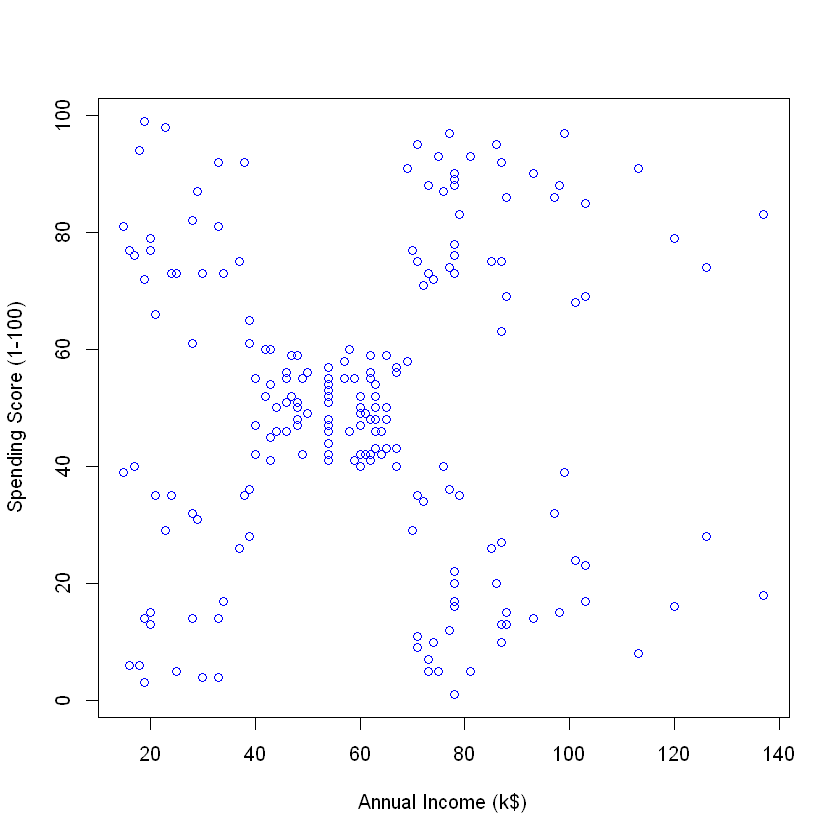

In [49]:
# feature
df = df[4:5]
plot(df, col='blue',
         xlab = 'Annual Income (k$)',
         ylab = 'Spending Score (1-100)')

In [37]:
seed = 101
set.seed(seed)

## 1. K Means Clustering

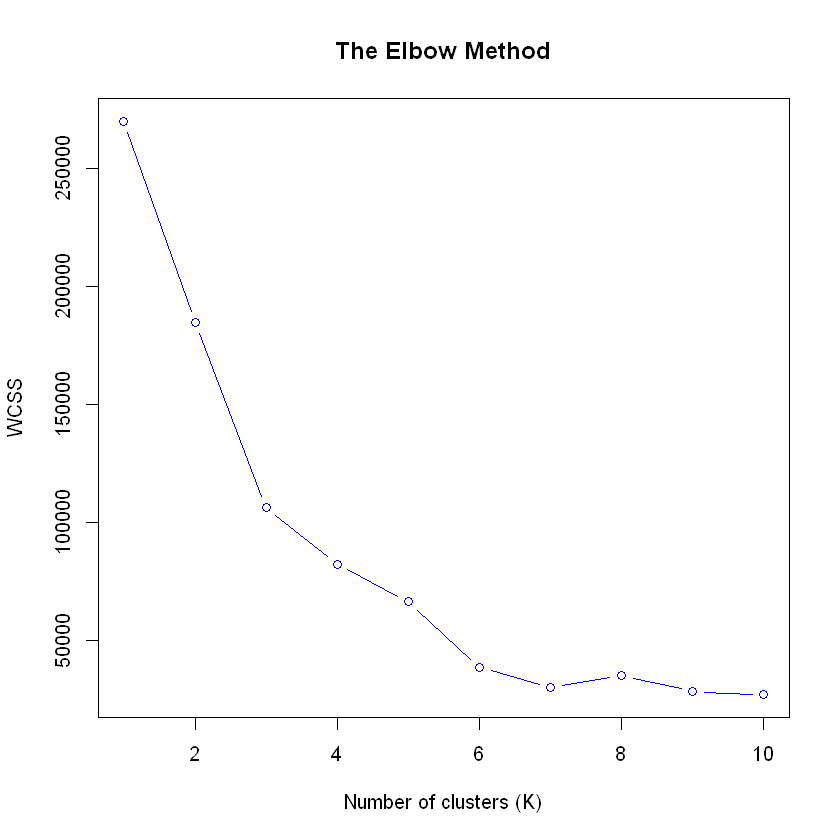

In [38]:
# Use the elbow method to find the optimal K, if k is unknown 
wcss = vector()
for (i in 1:10) wcss[i] = sum(kmeans(df, i)$withinss)
plot(1:10, wcss, type = 'b', col = 'blue', #within-cluster sum of squares
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters (K)',
     ylab = 'WCSS')

In [39]:
# Fit K-Means to the dataset
set.seed(seed)
kmeans = kmeans(x = df, centers = 5)
y_kmeans = kmeans$cluster

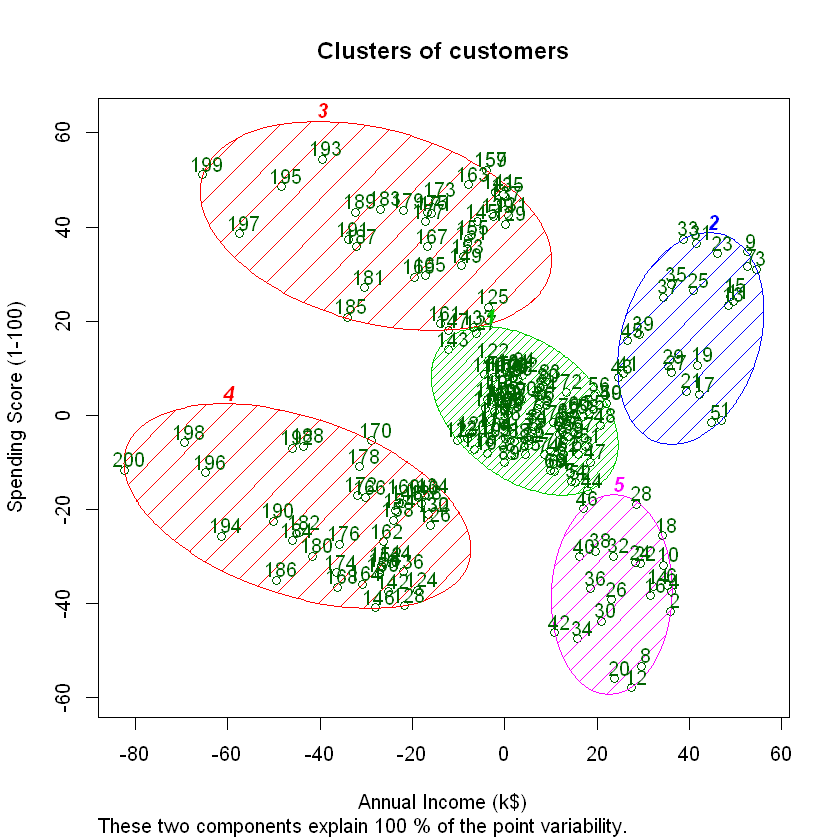

In [40]:
# Visualize the clusters
library(cluster)
clusplot(df,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Clusters of customers'),
         xlab = 'Annual Income (k$)',
         ylab = 'Spending Score (1-100)')

## 2. Hierarchical Clustering

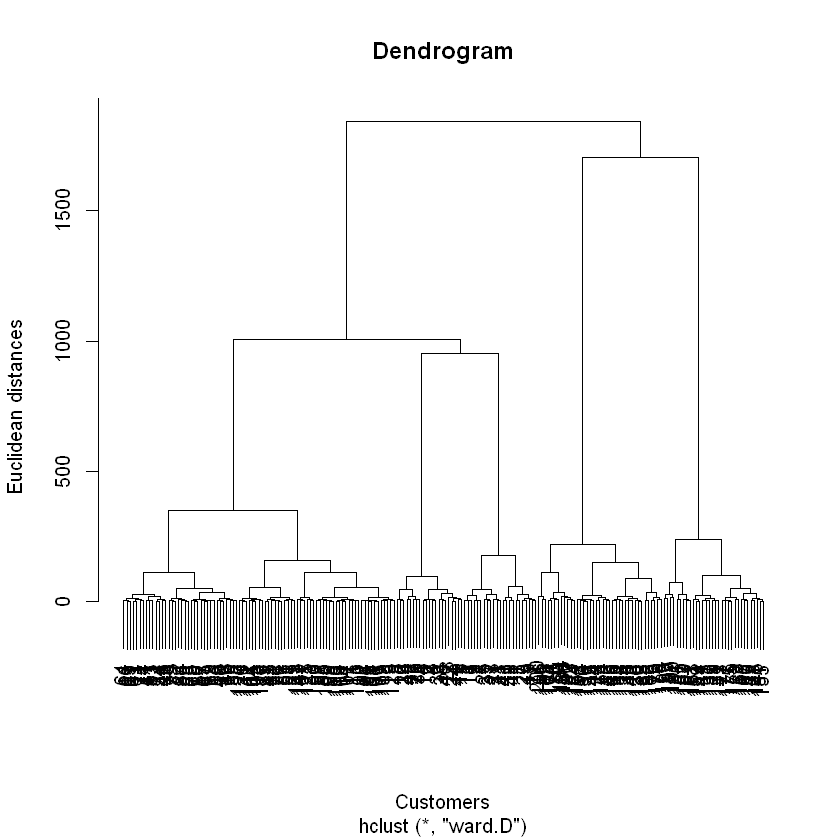

In [41]:
# Use the dendrogram to find the optimal number of clusters, if k is unknown
dendrogram = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendrogram'),
     xlab = 'Customers',
     ylab = 'Euclidean distances')

In [42]:
# Fit hc to the dataset  
hc = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 5)

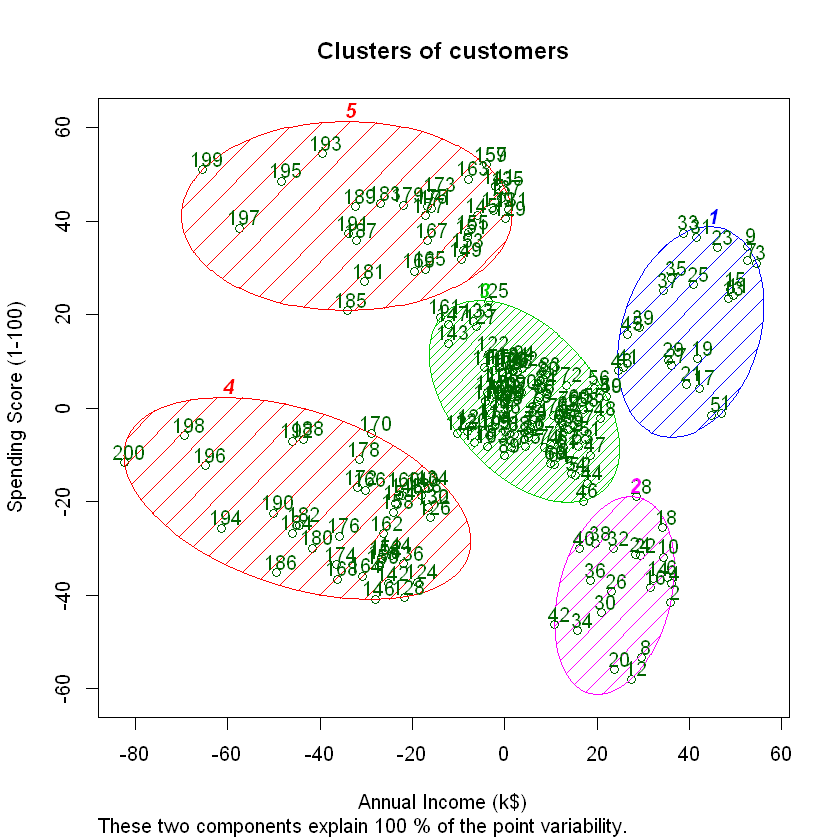

In [43]:
# Visualize the clusters
library(cluster)
clusplot(df,y_hc,lines = 0,shade = TRUE,color = TRUE,labels= 2,
         plotchar = FALSE,span = TRUE,
         main = paste('Clusters of customers'),
         xlab = 'Annual Income (k$)',
         ylab = 'Spending Score (1-100)')